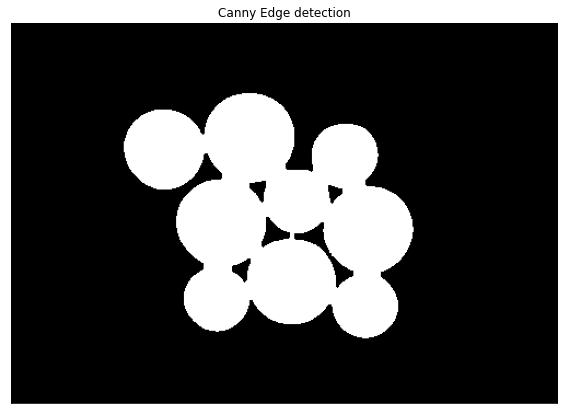

In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Opean and Load image
path = r'images/watershed.jpg'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Cretae gray image and blurred it!
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray,(5,5),3)
EL55 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,6))
EL33 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))

#Apply Canny edge detection (auto estimate threshold values)
#median = np.median(blurred)
#tuning = 0.7
#minT = int((1.0-tuning)*median)
#maxT = int((1.0+tuning)*median)
#canny = cv2.Canny(blurred, minT, maxT)

#Apply Otsu thresholding
(Tvalue, threshOtsu) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
threshOtsu = cv2.morphologyEx(threshOtsu, cv2.MORPH_CLOSE, EL55)

fig1, ax = plt.subplots(figsize=(10, 7))
ax.set(title='Canny Edge detection')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.imshow(threshOtsu, cmap='gray')

I can count 1 coins in this image


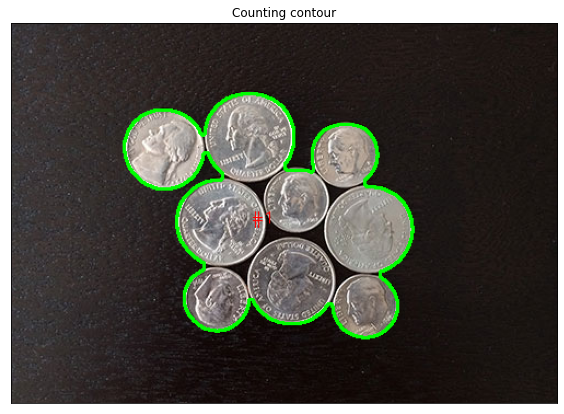

In [54]:
#Find contour on edged image
(cnts, _) = cv2.findContours(threshOtsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("I can count {} coins in this image".format(len(cnts)))

#Draw contour on image
coins = image.copy()
for (i, c) in enumerate(cnts):
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.putText(coins, "#{}".format(i+1), (int(cX)-10, int(cY)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)
    cv2.drawContours(coins, [c], -1, (0,255,0), 2)

#Plot individual coin
fig2, bx = plt.subplots(figsize=(10, 7))
bx.set(title='Counting contour')
bx.axes.xaxis.set_visible(False)
bx.axes.yaxis.set_visible(False)
bx.imshow(coins)